# Lending Club Case Study

From the given data set, understand how consumer attributes and loan attributes are going to influence the tendency of default or charged-off

**Problem Statement**

Identify the risky applicants so that they can minimize credit loss.





### Part 1 - To start with, import all the needed packages in the start of execution only. 

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

### Part 2 - Set few of the options needed for getting a better display on the output

Using pandas do load the given CSV file which is size ~33 MB. This file has got all the defined data as per Data_Dictionary.xls file where details about each column are given.
 

In [2]:
# Set few options for Dataframe which will be helpfull in viewing the output
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('expand_frame_repr', True)
#Check the datatypes of all the columns of the dataframe
lendingDF = pd.read_csv('loan.csv')
lendingDF.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [3]:
#Get the total number of rows and columns  present
lendingDF.shape

(39717, 111)

In [4]:
#Drop Columns in which more than 40% of them are having NaN values or not having any values
rowcounts = lendingDF.shape[0]
columnheaders = columnheaders = list(lendingDF.columns.values)

null_columnnames=[]
for x in columnheaders:
    sum = lendingDF[x].isnull().sum()
    null_percentage = (sum/rowcounts) * 100
    if null_percentage > 40:
        null_columnnames.append(x)

lendingDF.drop(null_columnnames,axis=1,inplace=True)
#Get the total number of rows and columns  present after Stage-1 cleanup 
lendingDF.shape

(39717, 54)

In [5]:
#Drop Columns in which there are only unquie values present. AS these values donot provide any further information
rowcounts = lendingDF.shape[0]
#GEt the new set of column headers
columnheaders = columnheaders = list(lendingDF.columns.values)
uniquevalues_columns = []
for x in columnheaders:
    if lendingDF[x].nunique()==1:
        uniquevalues_columns.append(x)

lendingDF.drop(uniquevalues_columns,axis=1,inplace=True)
#Get the total number of rows and columns  present after Stage-2 cleanup 
lendingDF.shape

(39717, 45)

Reading first 5 rows in the data frame to get an idea about the columns present after the first set of cleanup operations completed

In [6]:
lendingDF.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking a...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & ...",other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,Borrower added on 12/21/11 > I plan on combining three large interest bills together and freei...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [7]:
#Drop 'member_id','id','url', 'desc' as this column has only unique values and is of not much use in the EDA topic.
lendingDF.drop(['member_id','id','url','desc'],axis=1,inplace=True)
#Get the total number of rows and columns  present after Stage-3 cleanup 
lendingDF.shape

(39717, 41)

In [8]:
#On analysis of the "emp_title", column with values_count(), we can see only two values are there which are having more than 100
#Overall % of these records is less than 1%. So by dropping them we will not have much impact on the EDA topic.
lendingDF.drop(['emp_title','zip_code'],axis=1,inplace=True)
lendingDF.shape

(39717, 39)

In [9]:
lendingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In 'loan_status' column we are having three values.
As of now in the current usecase point of interest is only w.r.to identification of defaulters, so not picking values which are falling into category 'Current'

In [10]:
lendingDF = lendingDF[lendingDF['loan_status']!='Current']

In [11]:
#Get the total number of rows and columns  present
lendingDF.shape

(38577, 39)

In [12]:
#Findout columns which are having missing values
columnheaders = columnheaders = list(lendingDF.columns.values)

for x in columnheaders:
    sum = lendingDF[x].isnull().sum()
    if sum > 0:
        print(x,sum)

emp_length 1033
title 11
revol_util 50
last_pymnt_d 71
last_credit_pull_d 2
pub_rec_bankruptcies 697


In [13]:
#Fill missing values in "emp_length" column
#Convert the data type into string
lendingDF['emp_length'] = lendingDF['emp_length'].astype("string")
lendingDF['emp_length'] = lendingDF['emp_length'].fillna(lendingDF['emp_length'].mode()[0])

In [14]:
#Fill missing values in "revol_util" column by converting into string and later using apply convert to float
lendingDF['revol_util'] = lendingDF['revol_util'].astype("string")
lendingDF['revol_util'] = lendingDF['revol_util'].fillna(lendingDF['revol_util'].mode()[0])
lendingDF['revol_util'] = lendingDF['revol_util'].apply(lambda x: float(x[:-1]))
lendingDF['revol_util'].isnull().sum()

0

In [15]:
#Fill missing values in 'title' column using mode method.(First convert to string and then used mode)
lendingDF['title'] = lendingDF['title'].astype("string")
lendingDF['title'] = lendingDF['title'].fillna(lendingDF['title'].mode()[0])
lendingDF['title'].isnull().sum()

0

In [16]:
#Fill missing values in 'last_pymnt_d' column using mode method.(First convert to string and then used mode)
lendingDF['last_pymnt_d'] = lendingDF['last_pymnt_d'].astype("string")
lendingDF['last_pymnt_d'] = lendingDF['last_pymnt_d'].fillna(lendingDF['last_pymnt_d'].mode()[0])
lendingDF['last_pymnt_d'].isnull().sum()

0

In [17]:
#Fill missing values in 'last_credit_pull_d' column using mode method.(First convert to string and then used mode)
lendingDF['last_credit_pull_d'] = lendingDF['last_credit_pull_d'].astype("string")
lendingDF['last_credit_pull_d'] = lendingDF['last_credit_pull_d'].fillna(lendingDF['last_credit_pull_d'].mode()[0])
lendingDF['last_credit_pull_d'].isnull().sum()

0

In [18]:
#Dropping rows having null values in column 'pub_rec_bankruptcies'
lendingDF = lendingDF[~(lendingDF['pub_rec_bankruptcies'].isnull())]
lendingDF['pub_rec_bankruptcies'].isnull().sum()
lendingDF.shape

(37880, 39)

In [19]:
lendingDF['int_rate'] = lendingDF['int_rate'].astype("string")
lendingDF['int_rate'] = lendingDF['int_rate'].apply(lambda x: float(x[:-1]))

In [20]:
lendingDF['revol_util'] = lendingDF['int_rate'].astype("float32")

In [21]:
lendingDF.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  string
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       string
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float32
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

In [22]:
lendingDF['issue_d'] = pd.to_datetime(lendingDF['issue_d'],  format='%b-%y')
lendingDF['MonthOfIssue'] = lendingDF['issue_d'].dt.month
lendingDF['YearOfIssue'] = lendingDF['issue_d'].dt.year

Do check for outliers on 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', and 'annual_inc'

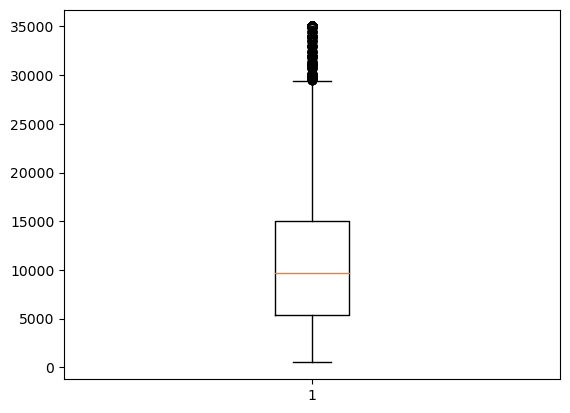

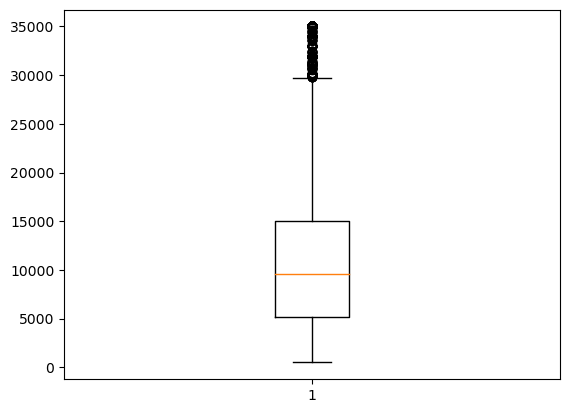

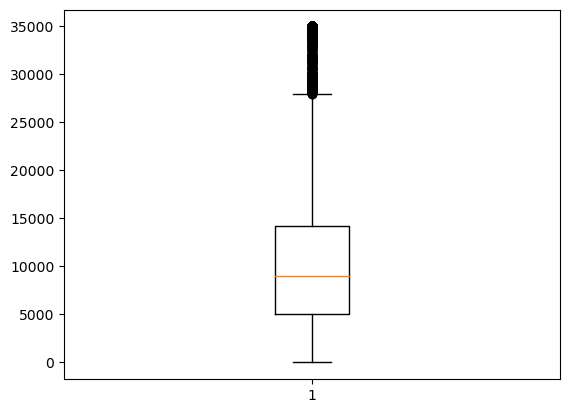

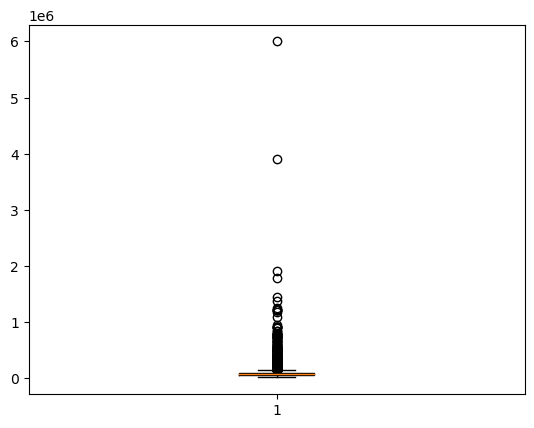

In [23]:
outlier_check_col = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc']
#outlier_check_col = ['loan_amnt', 'annual_inc']
for colName in outlier_check_col:
    plt.boxplot(lendingDF[colName])
    plt.show()

In [24]:
def remove_outliers_IQR_method(col_name):
    global lendingDF
    q1 = lendingDF[col_name].quantile(0.25)
    q3 = lendingDF[col_name].quantile(0.75)
    iqr = q3 - q1
    low_fence = q1 - 1.5*iqr
    high_fence = q3 + 1.5*iqr
    print(low_fence, high_fence)
    lendingDF = lendingDF[ (lendingDF[col_name]>=low_fence) & (lendingDF[col_name]<=high_fence)]

-9062.5 29437.5
-8584.375 27640.625
-7712.5 26187.5
-20000.0 140000.0


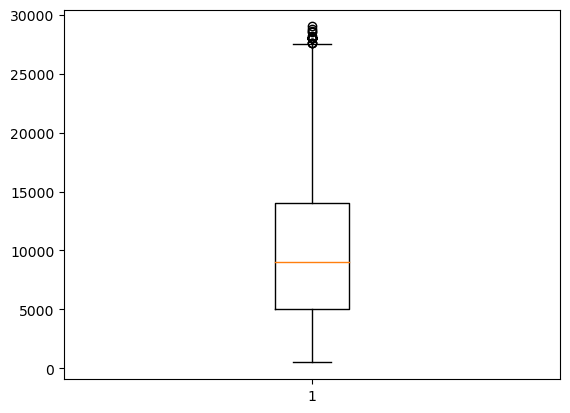

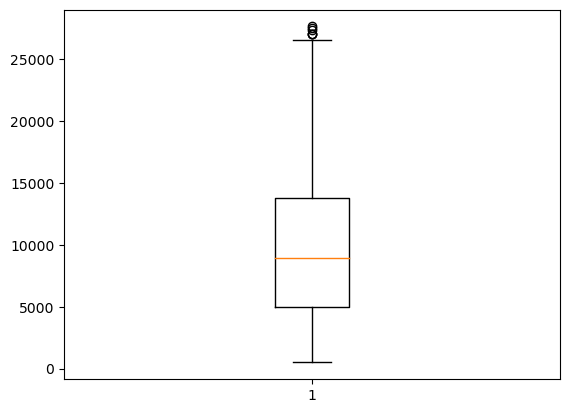

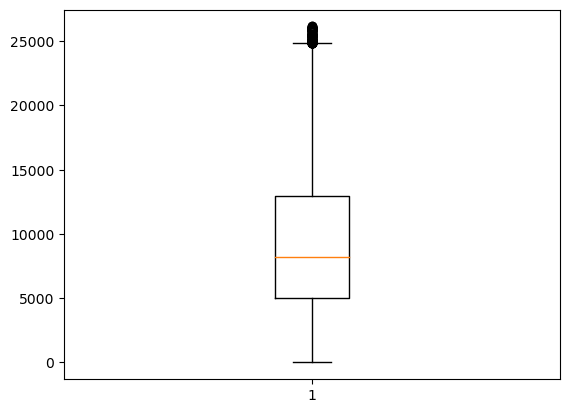

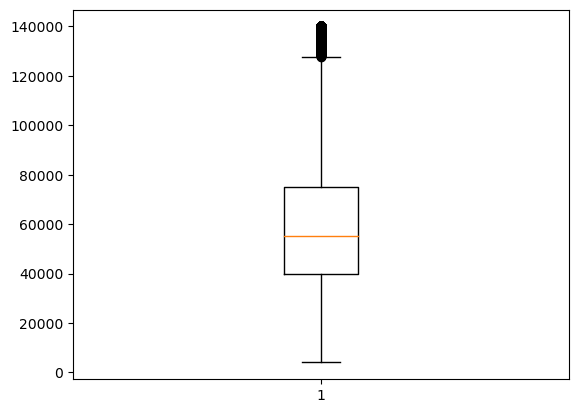

In [25]:
for colName in outlier_check_col:
    remove_outliers_IQR_method(colName)
    
for colName in outlier_check_col:
    plt.boxplot(lendingDF[colName])
    plt.show()

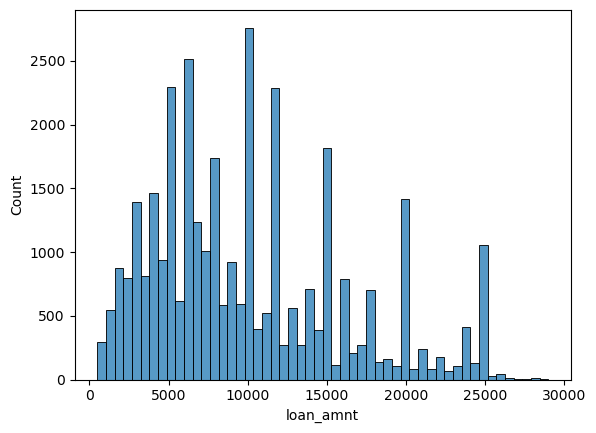

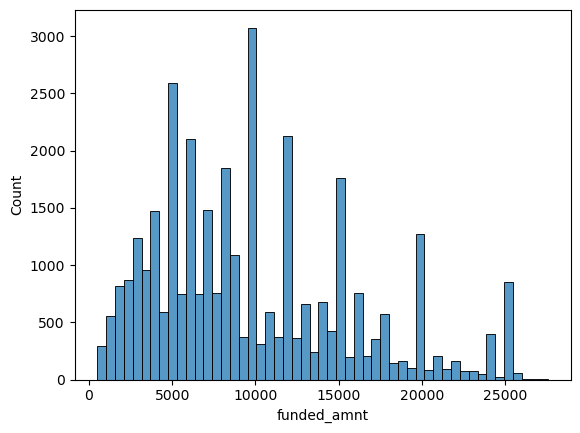

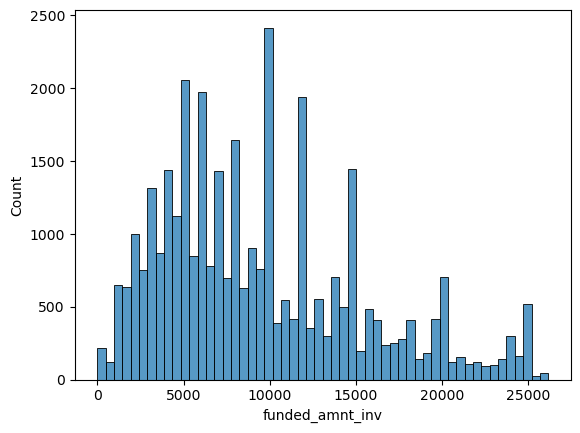

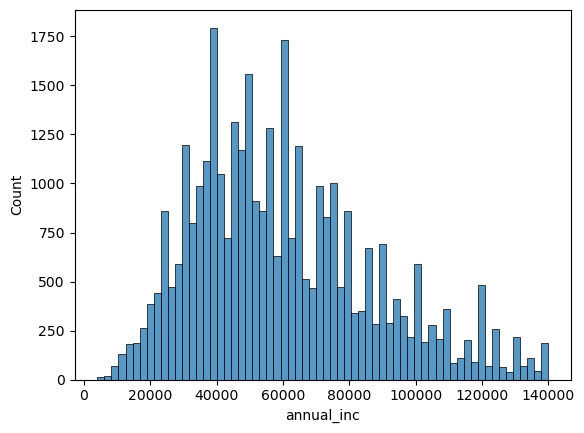

In [26]:
for colName in outlier_check_col:
    sns.histplot(lendingDF[colName])
    plt.show()

### Univariate Analysis

Loan Status column - Analysis (Unordered Categorical)

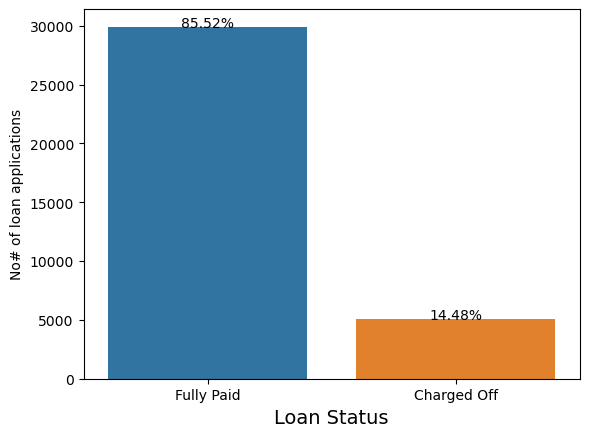

In [27]:
categorical_col = ['loan_status']
total_rows = lendingDF.shape[0]
pltAxes = sns.countplot(x = lendingDF[categorical_col[0]])
pltAxes.set_xlabel('Loan Status',fontsize=14)
pltAxes.set_ylabel('No# of loan applications') 
for p in pltAxes.patches:
    height = p.get_height()
    if np.isnan(height):
        height=0
    pltAxes.text(p.get_x()+p.get_width()/2., height, '{:1.2f}%'.format((height/total_rows)*100), ha="center")

plt.show()


Observation => From the current dataset we have 14% of people have defaulted or in chargedoff.

Employment tenure column - Analysis (Ordered Categorical)

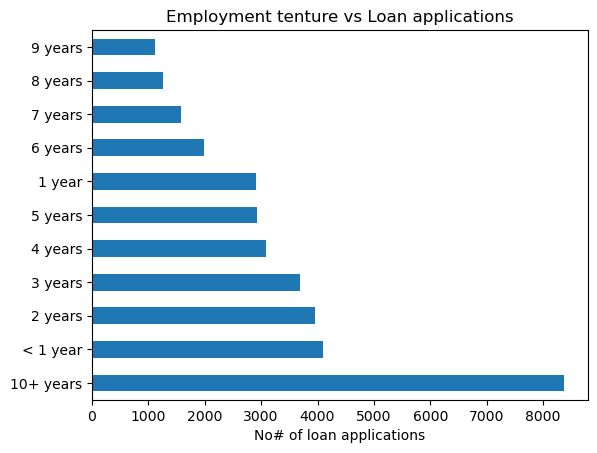

In [28]:
pltAxes = lendingDF['emp_length'].value_counts().plot.barh()
pltAxes.set_xlabel('No# of loan applications')
pltAxes.set_title('Employment tenture vs Loan applications')
plt.show()

Observation => Individuals having experience more than 10+years are taking more loans when compared with other experience levels

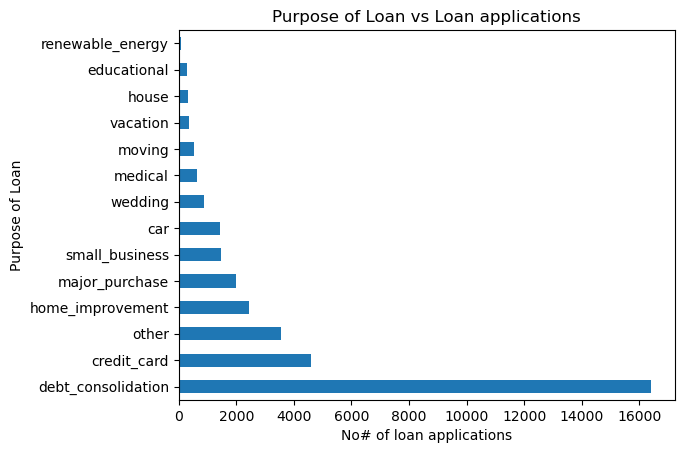

In [29]:
pltAxes = lendingDF['purpose'].value_counts().plot.barh()
pltAxes.set_xlabel('No# of loan applications')
pltAxes.set_ylabel('Purpose of Loan')
pltAxes.set_title('Purpose of Loan vs Loan applications')
plt.show()

In [30]:
num_category_cols = ['loan_amnt','funded_amnt','installment','int_rate']

Loan amount column - Analysis (Numerical)

In [31]:
lendingDF[num_category_cols[0]].describe()

count    34989.000000
mean     10090.705650
std       6141.285131
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      29000.000000
Name: loan_amnt, dtype: float64

<Axes: >

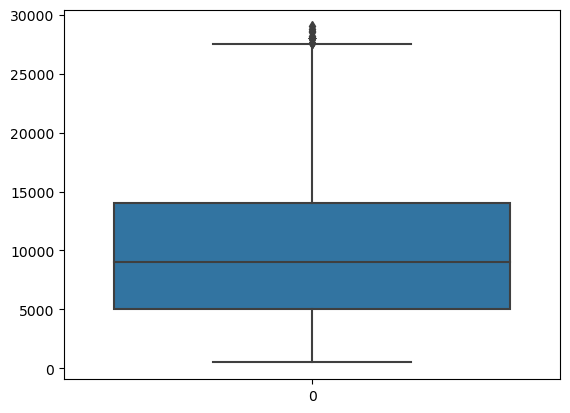

In [32]:
sns.boxplot(lendingDF[num_category_cols[0]])

Observation => Loan amount is between 500 to ~29,000 (Currency seems tobe in USD as the states name and other details in the data set point to US regions)

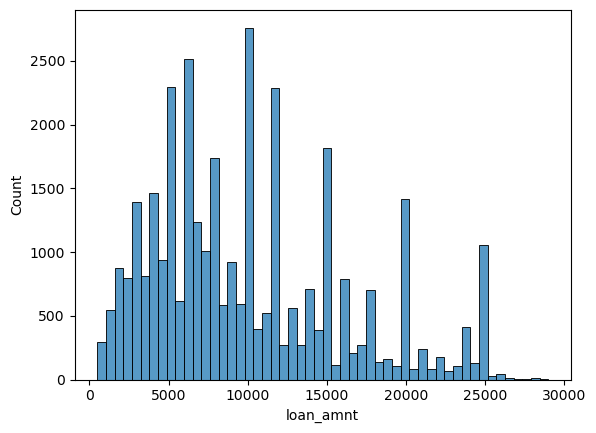

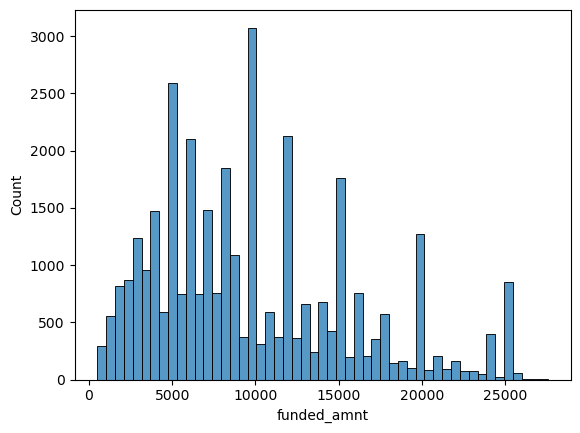

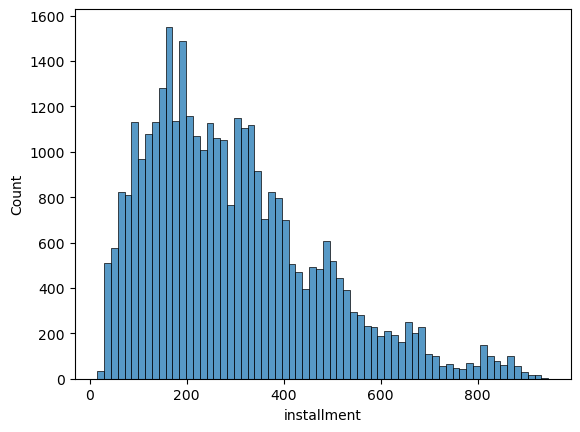

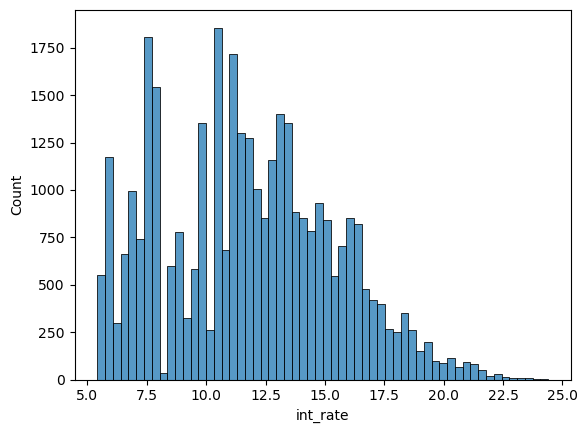

In [33]:
for colName in num_category_cols:
    sns.histplot(lendingDF[colName])
    plt.show()

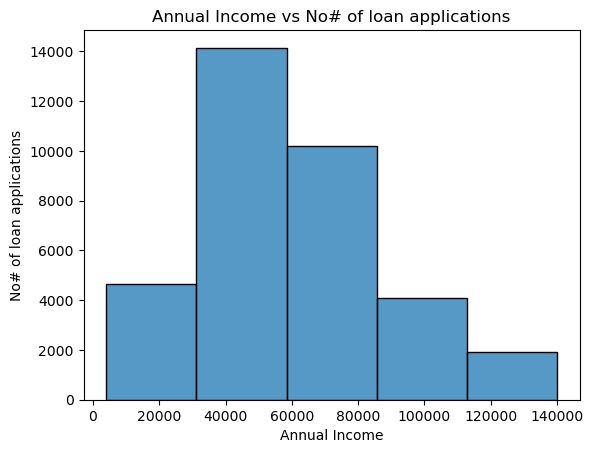

In [34]:
pltAxes = sns.histplot(lendingDF['annual_inc'],bins=5)
pltAxes.set_xlabel('Annual Income')
pltAxes.set_ylabel('No# of loan applications')
pltAxes.set_title('Annual Income vs No# of loan applications')
plt.show()

Observation => People with Annual Income in range of 30K to 90K are having high chances of getting loan

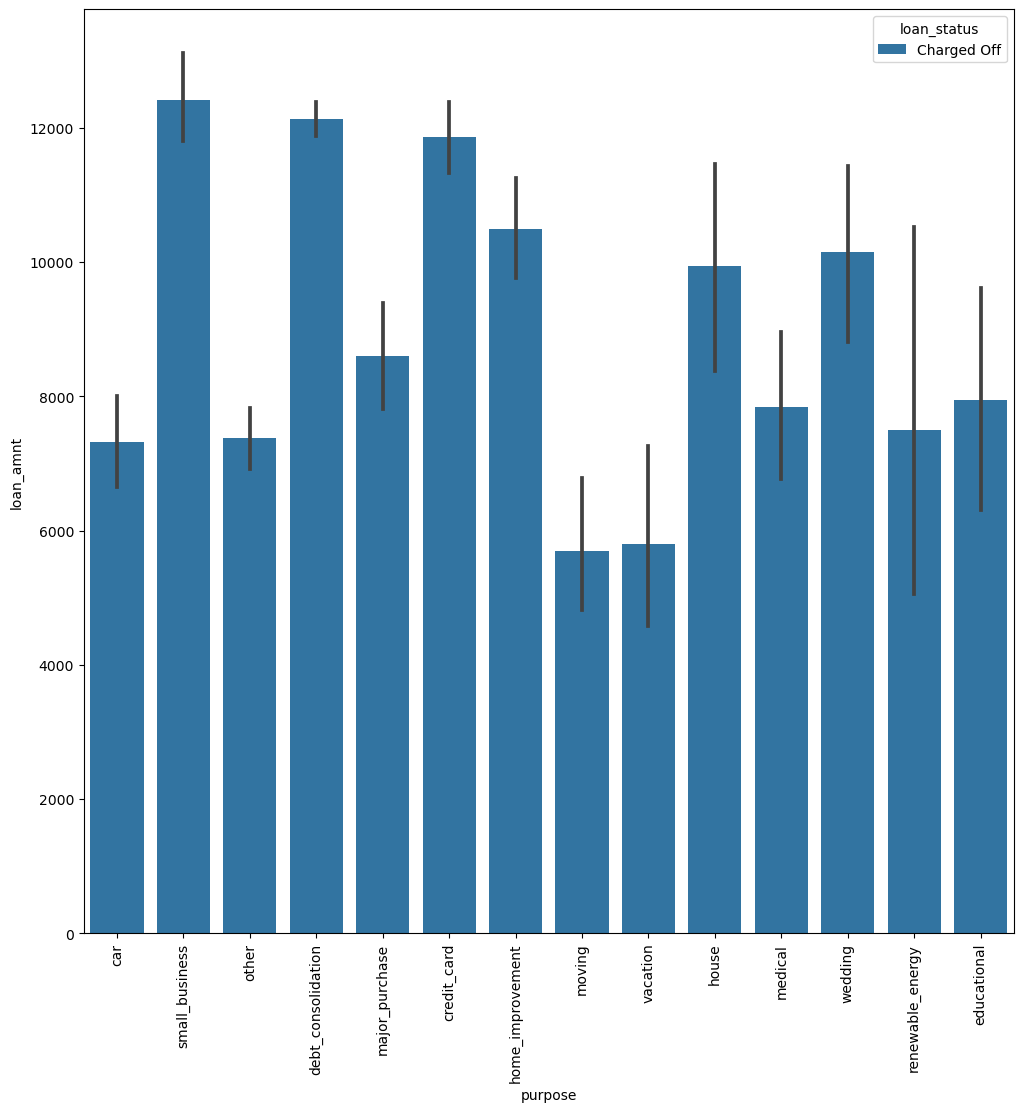

In [35]:
plt.figure(figsize=[12,12])
lendingDFbuss = lendingDF[lendingDF["loan_status"]=='Charged Off']
pltAxes = sns.barplot(x=lendingDFbuss["purpose"], y=lendingDFbuss["loan_amnt"], hue=lendingDFbuss["loan_status"])
pltAxes.set_xticklabels(pltAxes.get_xticklabels(), rotation=90) 
plt.show()

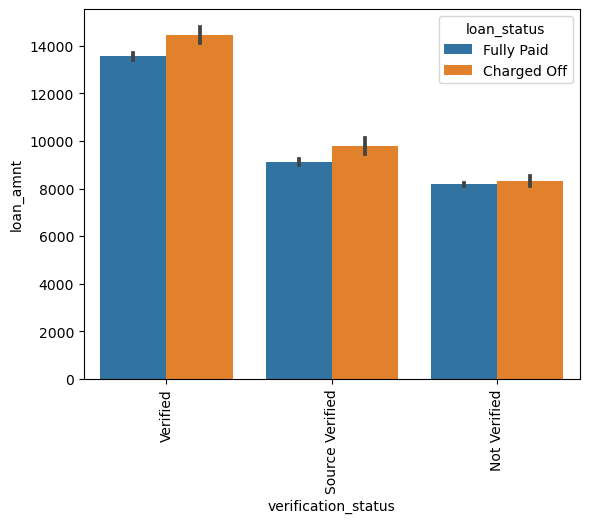

In [36]:
pltAxes = sns.barplot(x=lendingDF["verification_status"], y=lendingDF["loan_amnt"], hue=lendingDF["loan_status"])
pltAxes.set_xticklabels(pltAxes.get_xticklabels(), rotation=90) 
plt.show()

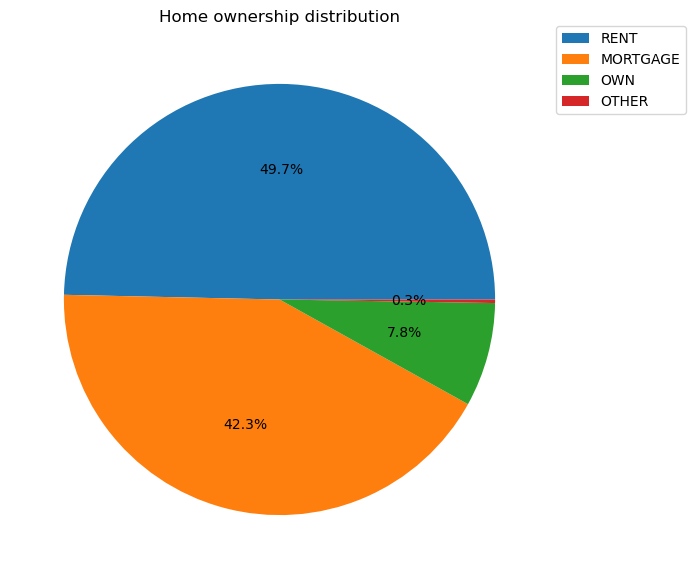

In [37]:
plt.figure(figsize=[7,7])
data = lendingDF['home_ownership'].value_counts()
pltAxes = data.plot(kind="pie", autopct='%1.1f%%', legend=True, title='Home ownership distribution', ylabel='', labeldistance=None)
pltAxes.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

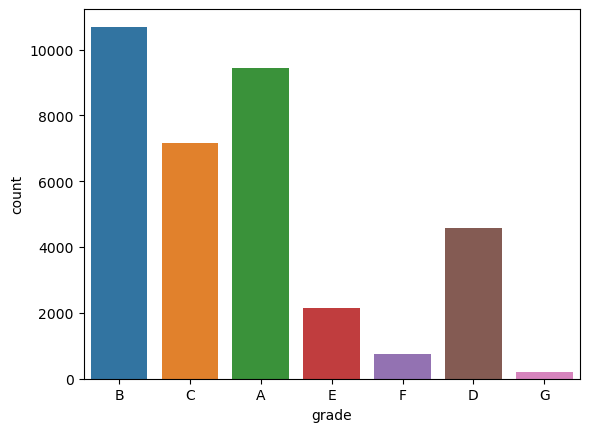

In [38]:
sns.countplot(x ='grade', data = lendingDF)
plt.show()

### Segmented Analysis

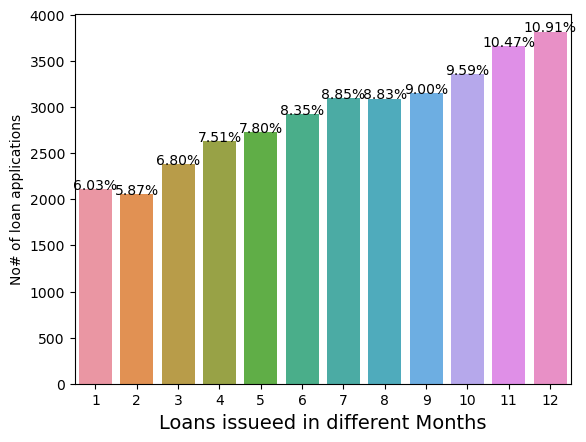

In [39]:
segmented_col = ['MonthOfIssue']
total_rows = lendingDF.shape[0]
pltAxes = sns.countplot(x = lendingDF[segmented_col[0]])
pltAxes.set_xlabel('Loans issueed in different Months',fontsize=14)
pltAxes.set_ylabel('No# of loan applications') 
for p in pltAxes.patches:
    height = p.get_height()
    if np.isnan(height):
        height=0
    pltAxes.text(p.get_x()+p.get_width()/2., height, '{:1.2f}%'.format((height/total_rows)*100), ha="center")

plt.show()

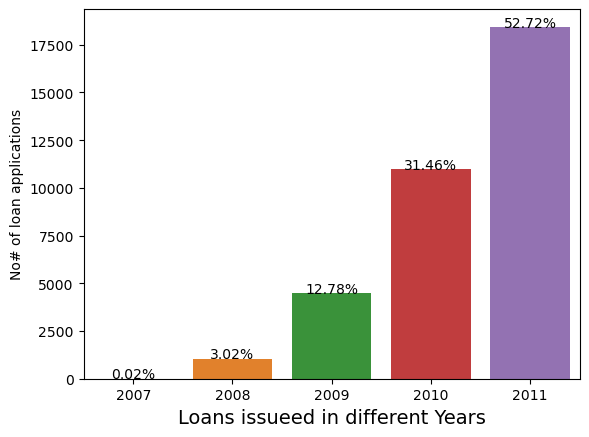

In [40]:
segmented_col = ['YearOfIssue']
total_rows = lendingDF.shape[0]
pltAxes = sns.countplot(x = lendingDF[segmented_col[0]])
pltAxes.set_xlabel('Loans issueed in different Years',fontsize=14)
pltAxes.set_ylabel('No# of loan applications') 
for p in pltAxes.patches:
    height = p.get_height()
    if np.isnan(height):
        height=0
    pltAxes.text(p.get_x()+p.get_width()/2., height, '{:1.2f}%'.format((height/total_rows)*100), ha="center")

plt.show()

### Bivariate Analysis

Loan amount vs Loan status - Analysis (Numerical vs Categorical,unordered)

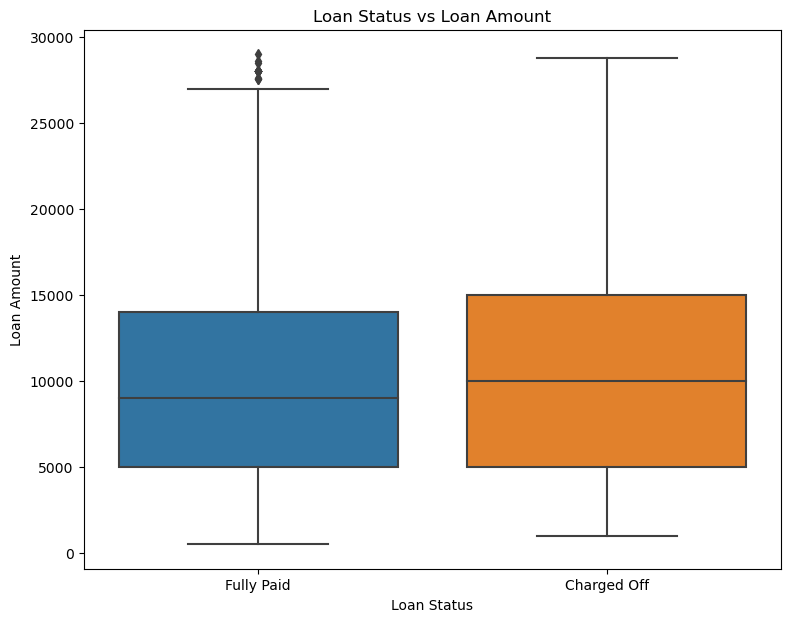

In [41]:
##Plot a box plot of 'Loan Status'' vs 'Loan Amount'
plt.figure(figsize=[9,7])
pltAxes = sns.boxplot(lendingDF,x='loan_status',y='loan_amnt')
pltAxes.set_xlabel('Loan Status')
pltAxes.set_ylabel('Loan Amount')
pltAxes.set_title('Loan Status vs Loan Amount')
plt.show()

Observation => "Charged_Off" status on Loan seems to high where there is a bigger loan amount

Loan status vs installment - Analysis (Categorical,unordered vs Numerical )

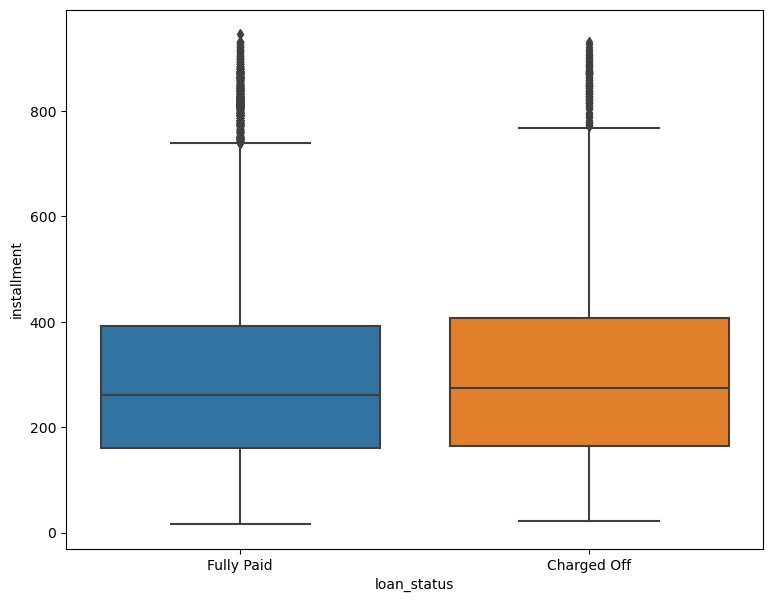

In [42]:
##Plot a box plot of 'Loan Status'' vs 'installment'
plt.figure(figsize=[9,7])
sns.boxplot(lendingDF,x='loan_status',y='installment')
plt.show()

Loan amount vs installment - Analysis (Numerical vs Numerical)

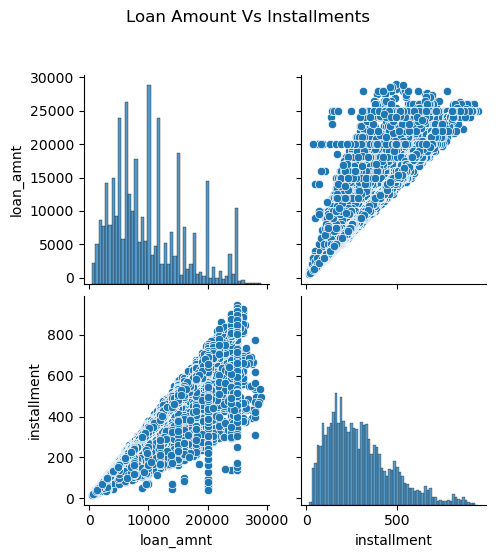

In [43]:
lables_axis = ['Loan Amount','Installements']
prGrid = sns.pairplot(lendingDF[['loan_amnt','installment']])
prGrid.fig.suptitle("Loan Amount Vs Installments",y = 1.1)
plt.show()

In [44]:
lendingDF['installment'].describe()

count    34989.000000
mean       296.929016
std        178.647816
min         16.080000
25%        161.320000
50%        263.000000
75%        394.360000
max        945.350000
Name: installment, dtype: float64

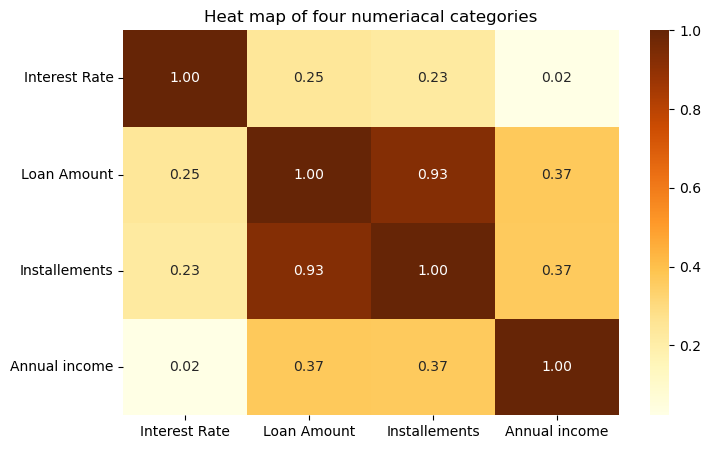

In [45]:
lables_axis = ['Interest Rate', 'Loan Amount','Installements', 'Annual income']
plt.figure(figsize=(8,5))
pltAxes = sns.heatmap(lendingDF[['int_rate','loan_amnt','installment','annual_inc']].corr(method ='pearson'), annot=True, fmt=".2f", cmap="YlOrBr")
pltAxes.set_title('Heat map of four numeriacal categories')
pltAxes.set_xticklabels(lables_axis)
pltAxes.set_yticklabels(lables_axis, rotation=0)
plt.show()

Observation => Max installment paid by a customer is ~980 and amount being paid is proporitanal to the loan amount taken

Loan amount vs States - Analysis (Numerical vs Categorical)

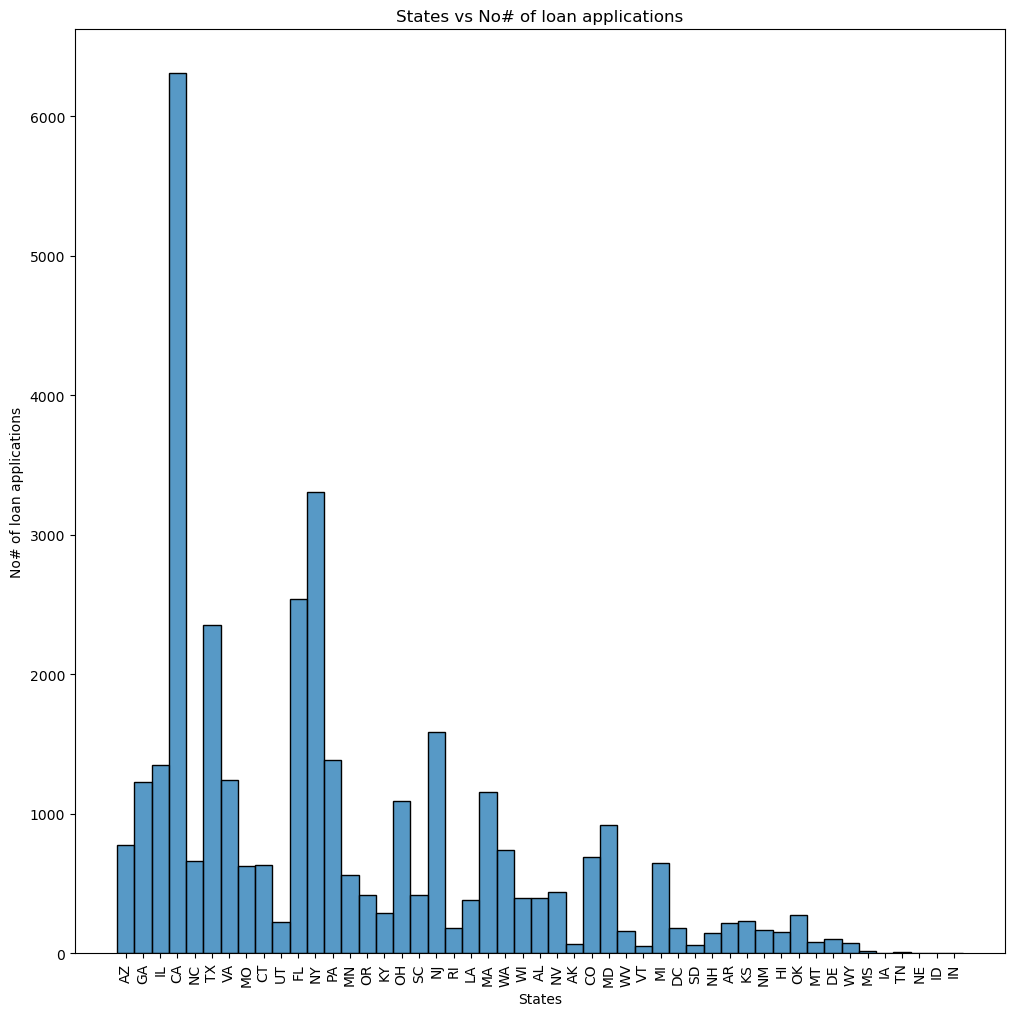

In [46]:
plt.figure(figsize=(12,12))
pltAxes = sns.histplot(lendingDF['addr_state'])
pltAxes.set_xticklabels(pltAxes.get_xticklabels(), rotation=90) 
pltAxes.set_xlabel('States')
pltAxes.set_ylabel('No# of loan applications')
pltAxes.set_title('States vs No# of loan applications')
plt.show()

Observation => Maximum amount of loans where taken from state code CA

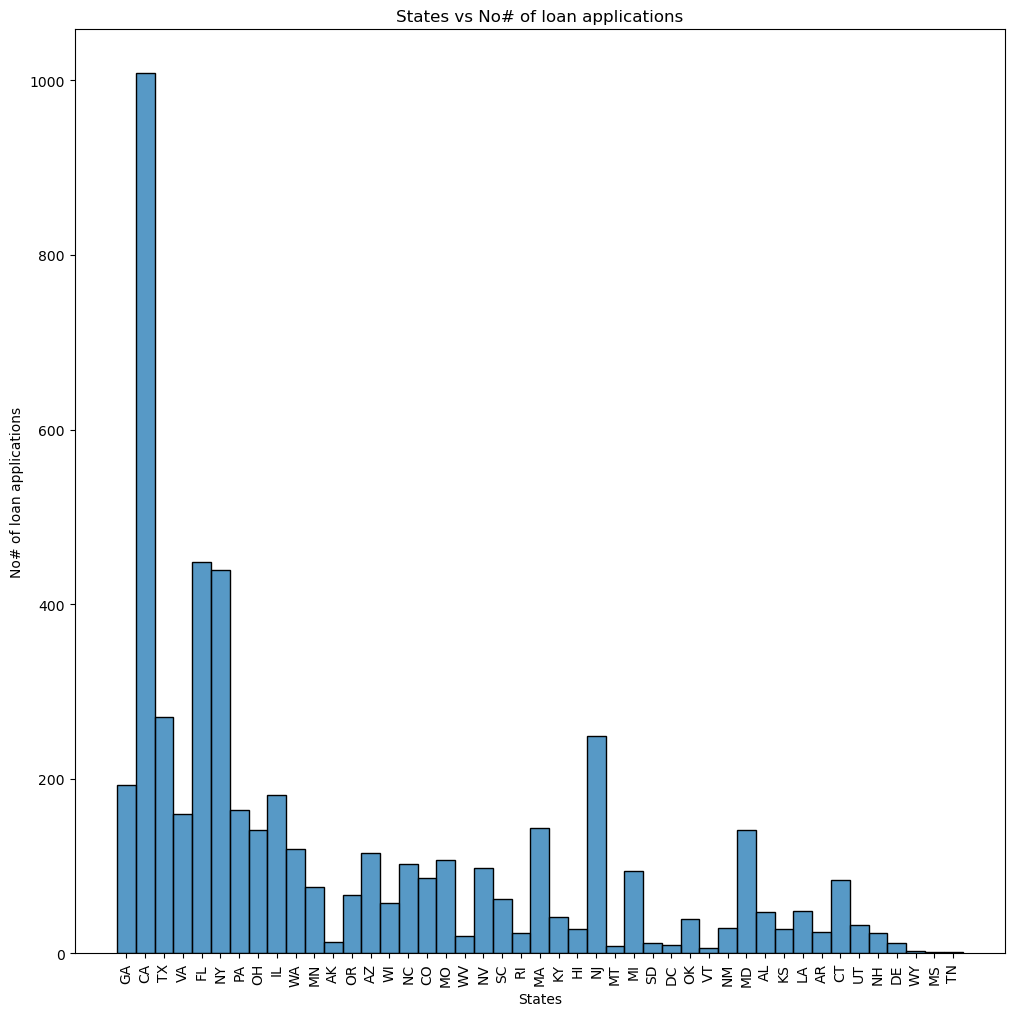

In [47]:
lendingDF_StateCharged = lendingDF[lendingDF['loan_status']=='Charged Off']
plt.figure(figsize=(12,12))
pltAxes = sns.histplot(lendingDF_StateCharged['addr_state'])
pltAxes.set_xticklabels(pltAxes.get_xticklabels(), rotation=90) 
pltAxes.set_xlabel('States')
pltAxes.set_ylabel('No# of loan applications')
pltAxes.set_title('States vs No# of loan applications')
plt.show()

Observation => Maximum amount of loans where defaulters are present in state with code CA

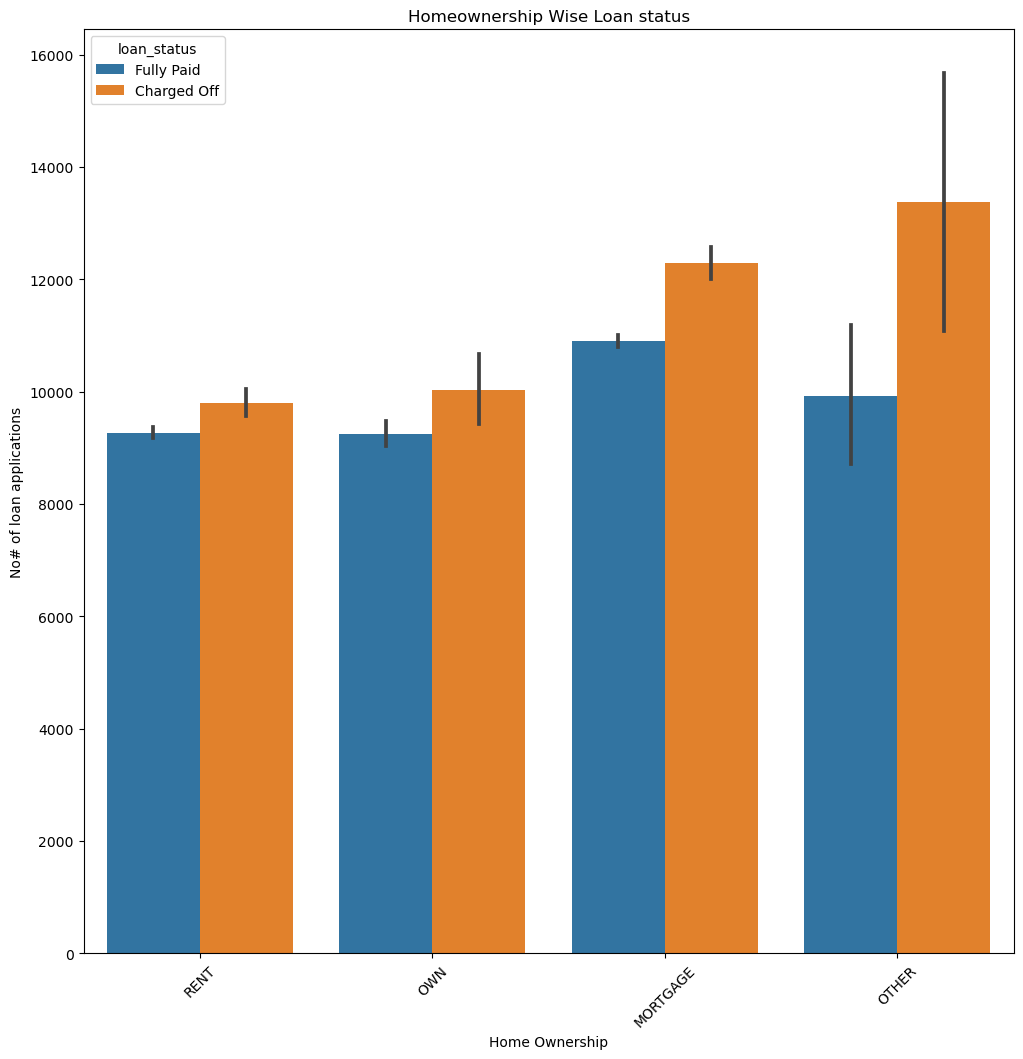

In [48]:
plt.figure(figsize=(12,12))
pltAxes = sns.barplot(x=lendingDF["home_ownership"], y=lendingDF["loan_amnt"], hue=lendingDF["loan_status"])
pltAxes.set_xticklabels(pltAxes.get_xticklabels(), rotation=45) 
pltAxes.set_xlabel('Home Ownership')
pltAxes.set_ylabel('No# of loan applications')
pltAxes.set_title('Homeownership Wise Loan status')
plt.show()

Observation => Maximum amount of loans where defaulters are present with home ownership in category mortgage or others.

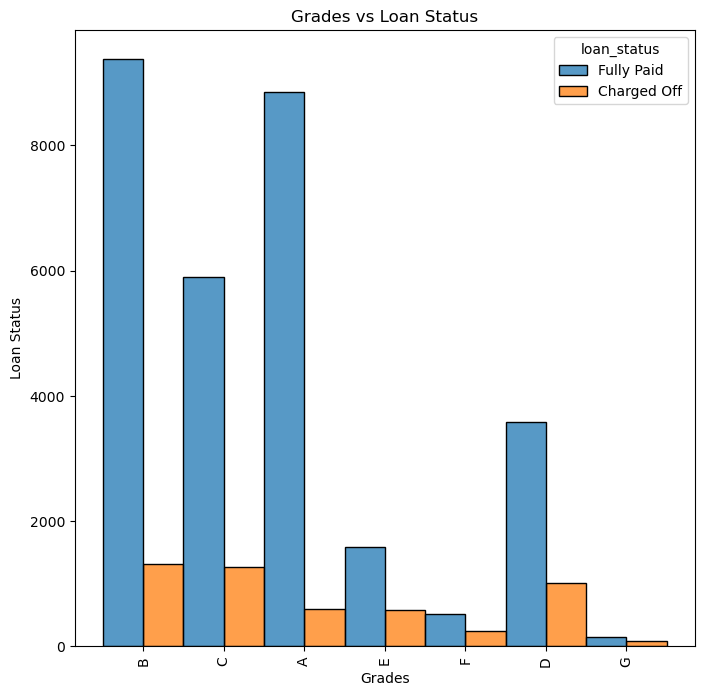

In [49]:
plt.figure(figsize=(8,8))
pltAxes = sns.histplot(x = lendingDF['grade'], hue=lendingDF['loan_status'],multiple="dodge")
pltAxes.set_xticklabels(pltAxes.get_xticklabels(), rotation=90) 
pltAxes.set_xlabel('Grades')
pltAxes.set_ylabel('Loan Status')
pltAxes.set_title('Grades vs Loan Status')
plt.show()

In [50]:
lendingDF['issue_d'].value_counts()

2011-12-01    1846
2011-11-01    1835
2011-10-01    1678
2011-09-01    1668
2011-08-01    1603
2011-07-01    1576
2011-06-01    1533
2011-05-01    1472
2011-04-01    1411
2011-01-01    1320
2011-03-01    1300
2010-12-01    1210
2011-02-01    1204
2010-07-01    1083
2010-11-01    1076
2010-10-01    1074
2010-09-01    1028
2010-08-01    1028
2010-06-01     987
2010-05-01     886
2010-04-01     791
2010-03-01     698
2010-02-01     592
2009-11-01     569
2010-01-01     554
2009-12-01     553
2009-10-01     513
2009-09-01     423
2009-08-01     390
2009-07-01     355
2009-06-01     338
2009-05-01     305
2009-04-01     280
2009-03-01     267
2009-02-01     250
2009-01-01     229
2008-12-01     207
2008-11-01     180
2008-04-01     146
2008-03-01     114
2008-10-01      89
2008-07-01      81
2008-05-01      67
2008-08-01      66
2008-06-01      65
2008-09-01      29
2008-02-01       7
2008-01-01       6
2007-12-01       2
2007-11-01       2
2007-08-01       2
2007-10-01       1
Name: issue_